In [6]:
import math

import giancarlo as gc
gc.PlotStyle.style = 'dark_background'

Qu = gc.Symbol('Q_u')
Qd = gc.Symbol('Q_d')
Qp = gc.Symbol('Q_+')
Qm = gc.Symbol('Q_-')

u, ubar = gc.SpinorField('u')
d, dbar = gc.SpinorField('d')
A = gc.PhotonField()

class J:
    def __init__(self, x, mu):
        sa, sb = gc.default.var(), gc.default.var()
        self.sa = sa
        self.sb = sb
        self.x = x
        self.mu = mu
 
    def __call__(self):
        up = ubar(self.x, self.sa) * gc.DiracGamma(self.mu, self.sa, self.sb) * u(self.x, self.sb)
        down = dbar(self.x, self.sa) * gc.DiracGamma(self.mu, self.sa, self.sb) * d(self.x, self.sb)
        return Qu * up + Qd * down
        #return gc.CNumber(1,2) * Qp * (up+down) + (gc.CNumber(1,2) * Qm * (up - down))

def J1(x, mu):
    a, b = gc.default.var(), gc.default.var()
    up = ubar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)
    down = dbar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)
    return gc.CNumber(1, 2) * (up - down)

def Jn(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return gc.CNumber(math.sqrt(2), 2) * dbar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)

def Jp(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return gc.CNumber(math.sqrt(2), 2) * ubar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)

isoqcd = {'S_{u}': 'S', 'S_{d}': 'S'}

J1('x', r'\mu')

( +\frac{1}{2}\,\bar{u}(x, x_{19})\,G(\mu, x_{19})\,G(\mu, x_{20})\,u(x, x_{20})-\frac{1}{2}\,\bar{d}(x, x_{19})\,G(\mu, x_{19})\,G(\mu, x_{20})\,d(x, x_{20}) )

In [15]:
hvp = J1('x', r'\mu') * J1('y', r'\nu')
hvp.wick().replace(isoqcd).trace(['spin']).simplify()

( -\frac{1}{2}\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, x) ] )

In [16]:
tau = Jp('x', r'\mu') * Jn('y', r'\nu')
tau.wick().replace(isoqcd).trace(['spin']).simplify()

( -\frac{1}{2}\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, x) ] )

# HVP Isospin-1 QED corrections

In [17]:
gc.PlotStyle.points['z1'] = gc.PlotStyle.point(color='C2')
gc.PlotStyle.points['z2'] = gc.PlotStyle.point(color='C2')

Jz1 = J('z1', r'\alpha')
Jz2 = J('z2', r'\beta')

syms = []
syms.append(gc.ExchangeSymmetry(pos=[Jz1.x, Jz2.x], lorentz=[Jz1.mu, Jz2.mu]))
syms.append(gc.ExchangeSymmetry(spin=[Jz1.sa, Jz2.sa]))
syms.append(gc.ExchangeSymmetry(spin=[Jz1.sb, Jz2.sb]))

double_qed = Jz1() * Jz2()

In [19]:
hvp_qed = hvp * double_qed
hvp_qed_1 = hvp_qed.wick().replace(isoqcd)

len(hvp_qed_1)

120

In [20]:
len(hvp_qed_1.simplify())

14

In [27]:
hvp_qed_2 = hvp_qed_1.trace(['spin']).simplify(
    gc.ExchangeSymmetry(pos=['x','y'], lorentz=[r'\mu',r'\nu']),
    gc.ExchangeSymmetry(pos=['z1','z2'], lorentz=[r'\alpha',r'\beta'])
)

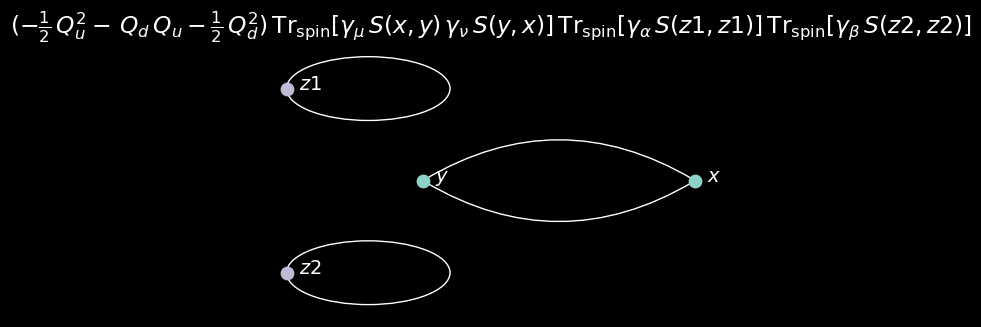

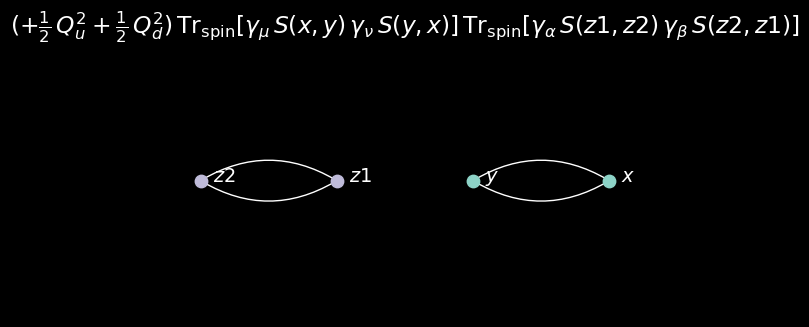

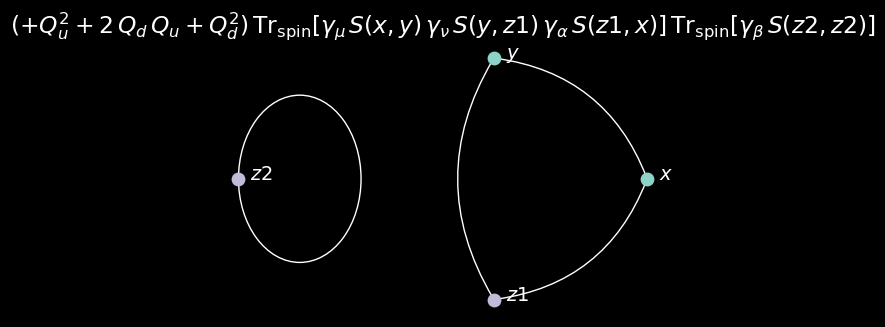

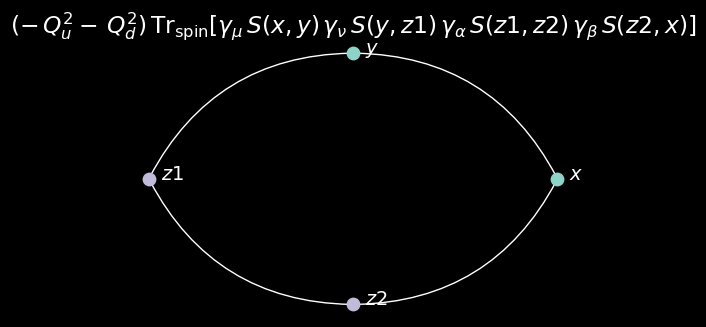

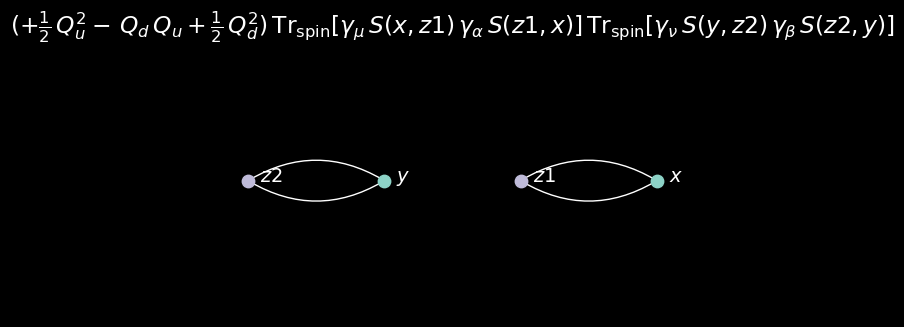

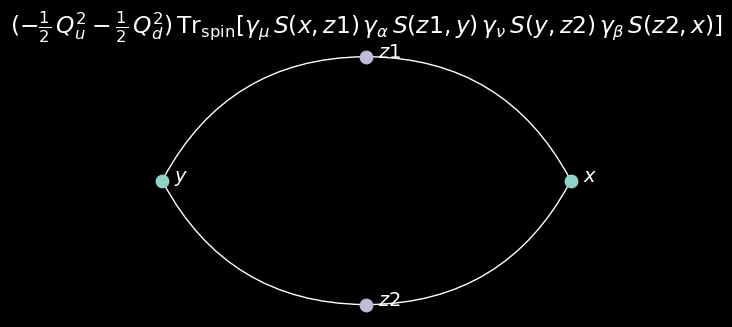

In [28]:
hvp_qed_2.draw()

# Tau two-point correlator QED corrections

In [24]:
tau_qed = tau * double_qed
tau_qed_1 = tau_qed.wick().replace(isoqcd)
len(tau_qed_1)

20

In [25]:
tau_qed_2 = tau_qed_1.trace(['spin']).simplify(
    gc.ExchangeSymmetry(pos=['x','y'], lorentz=[r'\mu',r'\nu']),
    gc.ExchangeSymmetry(pos=['z1','z2'], lorentz=[r'\alpha',r'\beta']))
len(tau_qed_2)

5

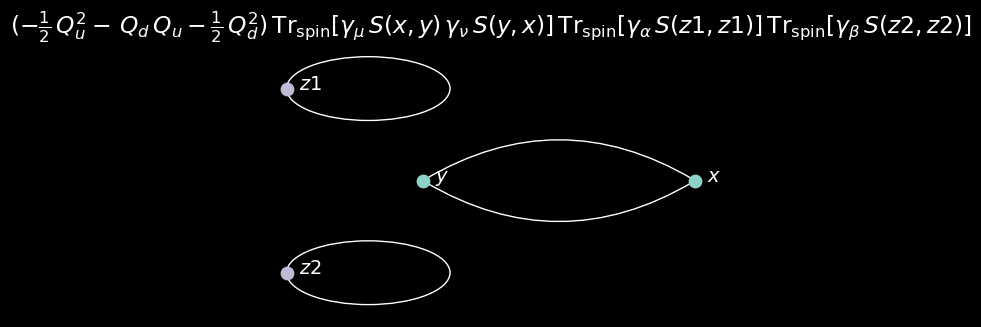

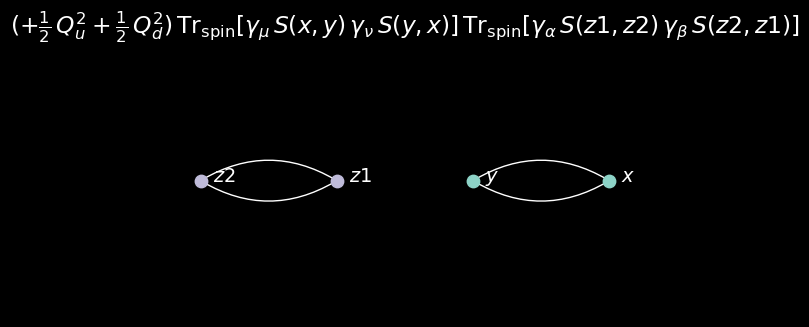

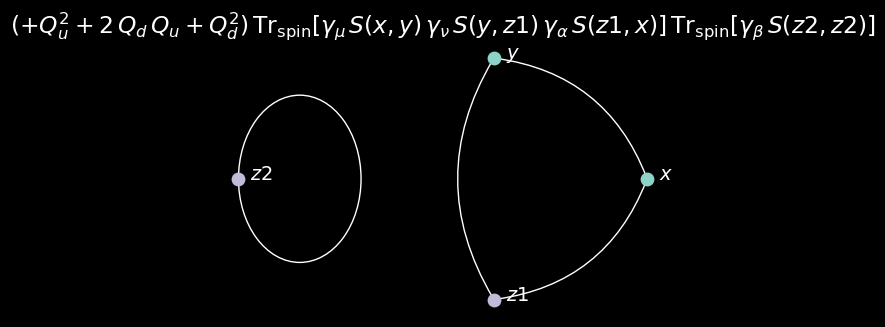

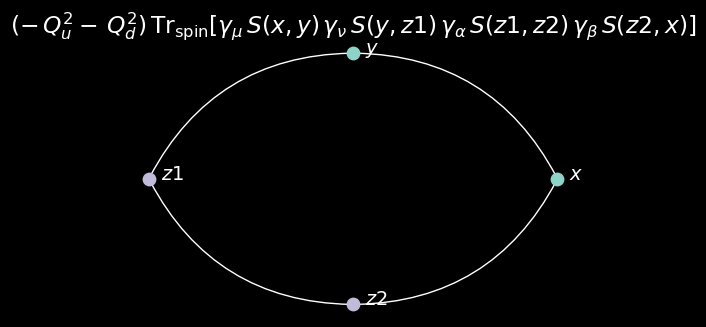

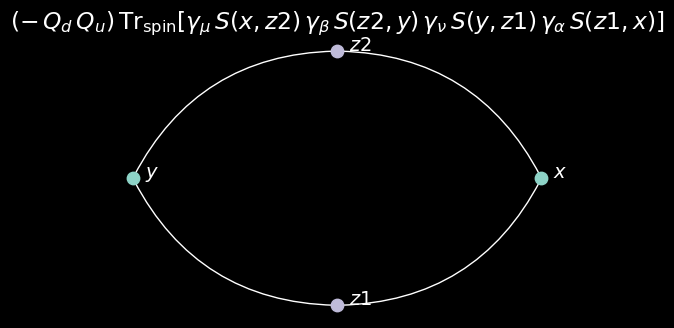

In [26]:
tau_qed_2.draw()

In [29]:
(hvp_qed_1.trace(['spin']) - tau_qed_1.trace(['spin'])).simplify(
    gc.ExchangeSymmetry(pos=['x','y'], lorentz=[r'\mu',r'\nu']),
    gc.ExchangeSymmetry(pos=['z1','z2'], lorentz=[r'\alpha',r'\beta'])
)

( +( +\frac{1}{2}\,Q_u^2-\,Q_d\,Q_u+\frac{1}{2}\,Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, z1)\,\gamma_{\alpha}\,S(z1, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, z2)\,\gamma_{\beta}\,S(z2, y) ]+( -\frac{1}{2}\,Q_u^2-\frac{1}{2}\,Q_d^2+Q_d\,Q_u )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, z1)\,\gamma_{\alpha}\,S(z1, y)\,\gamma_{\nu}\,S(y, z2)\,\gamma_{\beta}\,S(z2, x) ] )

# Tau RI-MOM

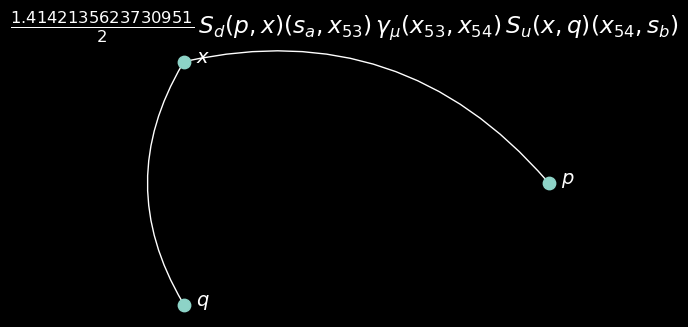

In [30]:
rimom = d('p', 's_a') * Jn('x',r'\mu') * ubar('q','s_b')
rimom.wick().draw()

In [34]:

rimom_qed = gc.CNumber(math.sqrt(2)) * rimom * double_qed
rimom_qed_2 = rimom_qed.wick().replace(isoqcd).simplify(*syms)
rimom_qed_2

( +( +Q_u^2+2\,Q_d\,Q_u+Q_d^2 )\,S(p, x)(s_a, x_{53})\,\gamma_{\mu}(x_{53}, x_{54})\,S(x, q)(x_{54}, s_b)\,\gamma_{\alpha}(x_{49}, x_{50})\,S(z1, z1)(x_{50}, x_{49})\,\gamma_{\beta}(x_{51}, x_{52})\,S(z2, z2)(x_{52}, x_{51})+( -\,Q_u^2-\,Q_d^2 )\,S(p, x)(s_a, x_{53})\,\gamma_{\mu}(x_{53}, x_{54})\,S(x, q)(x_{54}, s_b)\,\gamma_{\alpha}(x_{49}, x_{50})\,S(z1, z2)(x_{50}, x_{51})\,\gamma_{\beta}(x_{51}, x_{52})\,S(z2, z1)(x_{52}, x_{49})+( -2\,Q_u^2-2\,Q_d\,Q_u )\,S(p, x)(s_a, x_{53})\,\gamma_{\mu}(x_{53}, x_{54})\,S(x, z1)(x_{54}, x_{49})\,\gamma_{\alpha}(x_{49}, x_{50})\,S(z1, q)(x_{50}, s_b)\,\gamma_{\beta}(x_{51}, x_{52})\,S(z2, z2)(x_{52}, x_{51})+( +2\,Q_u^2 )\,S(p, x)(s_a, x_{53})\,\gamma_{\mu}(x_{53}, x_{54})\,S(x, z1)(x_{54}, x_{49})\,\gamma_{\alpha}(x_{49}, x_{50})\,S(z1, z2)(x_{50}, x_{51})\,\gamma_{\beta}(x_{51}, x_{52})\,S(z2, q)(x_{52}, s_b)+( -2\,Q_d\,Q_u-2\,Q_d^2 )\,S(p, z2)(s_a, x_{51})\,\gamma_{\mu}(x_{53}, x_{54})\,S(x, q)(x_{54}, s_b)\,\gamma_{\alpha}(x_{49}, x_{50})\,

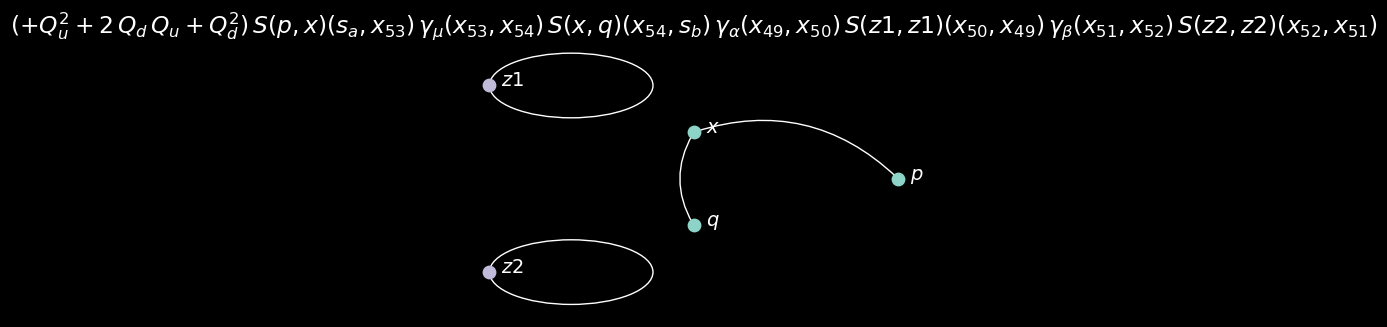

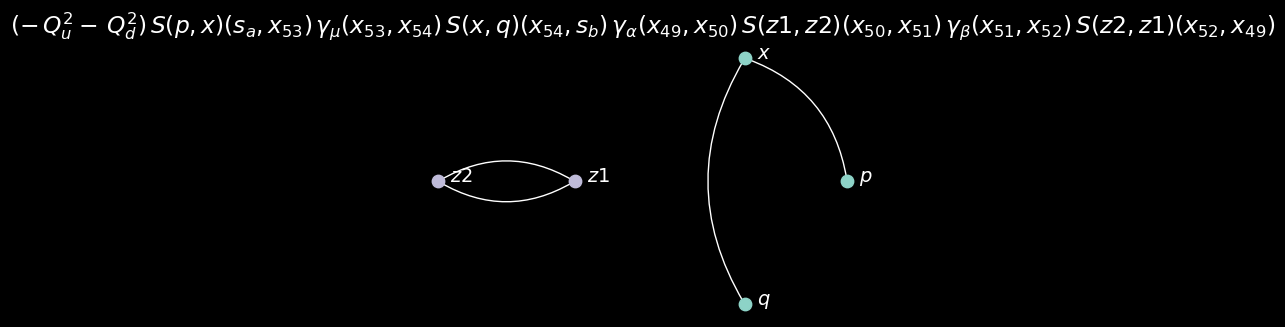

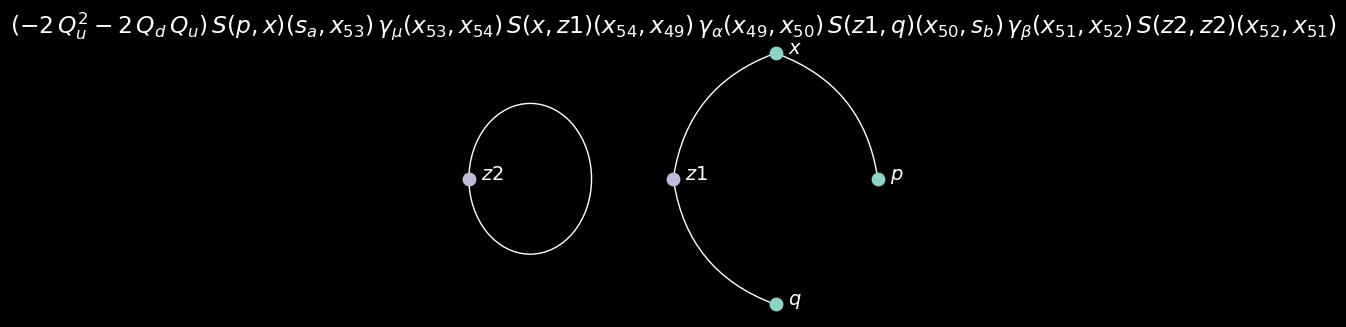

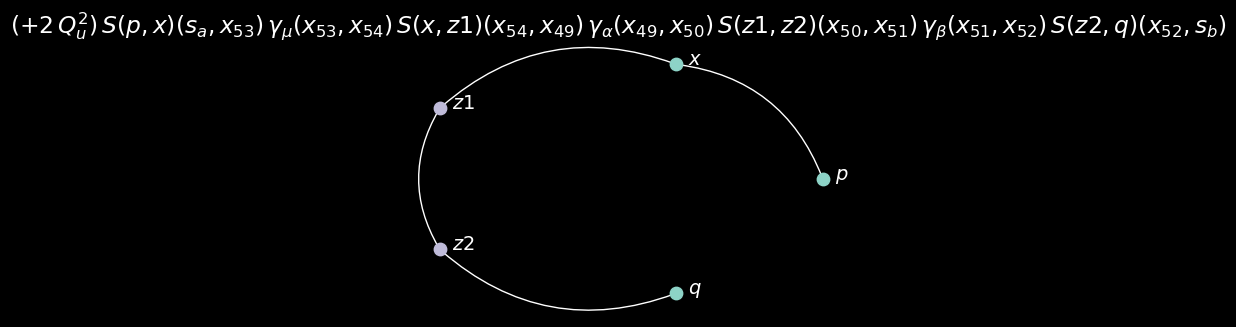

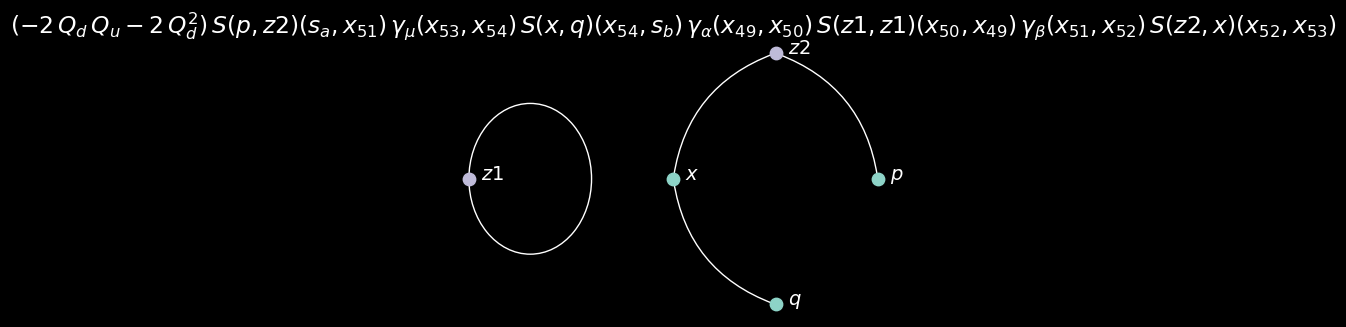

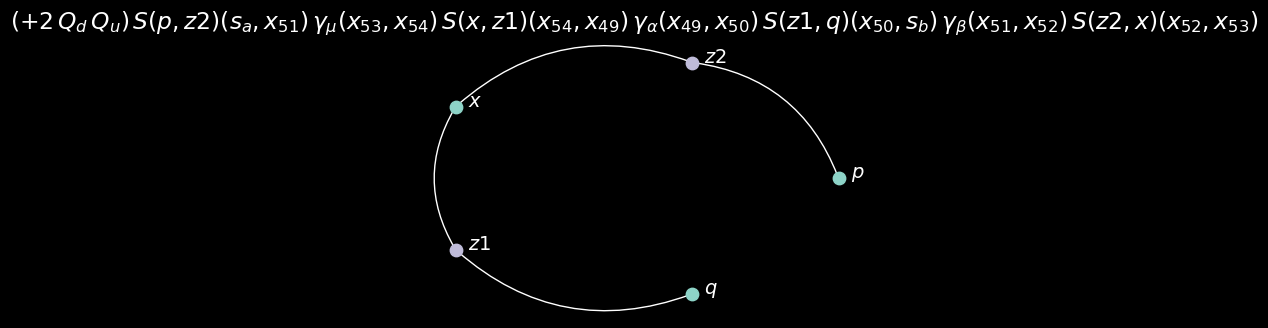

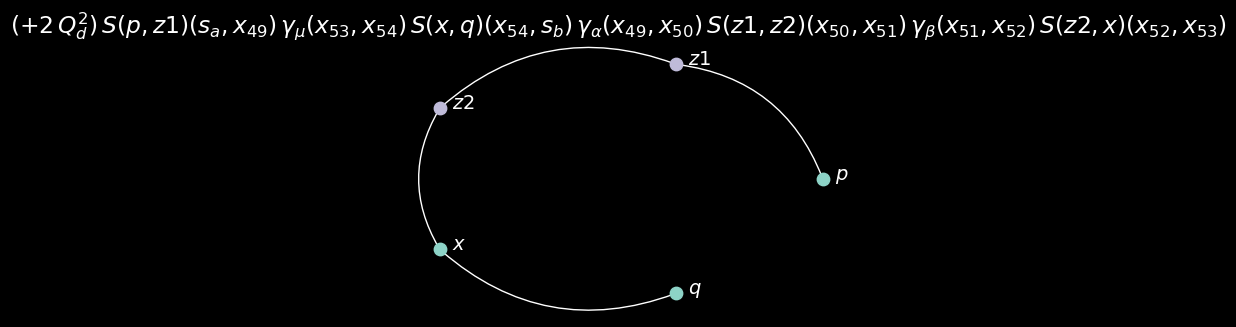

In [35]:
rimom_qed_2.draw()